In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from random import random
from utils import add_path, save_in

add_path()

from model import (
    SocietyConstantsEnergyPrices,
    GovernmentBuildChargingStation,
    GovernmentCloseChargingStation,
    GovernmentMixedStrategy,
)
from model.utils import common_params
from model import EV, CV, PHEV


In [2]:
# plt.style.use("dark_background")
# plt.style.use("grayscale")
plt.rc("grid", alpha=0.3)

In [3]:
car_types = [CV, PHEV, EV]
colors = {
    CV: "#3274A1",
    PHEV: "#E1812C",
    EV: "#3A923A",
    }


In [4]:
pop = 673_900

area = 293  # [km^2]
print(pop / area)
print(((area / 100) ** 0.5) * 10)

2300.0
17.11724276862369


przyjmuje skale 1:100

miasto 1j = 100m 
(54, 54)
populację 6_500, a osób posiadających auta 3_000
początkowa liczba ładowarek 6

In [5]:
(17 / 10) ** 2

2.8899999999999997

In [6]:
(54 / 10) ** 2

29.160000000000004

In [7]:
T = 100
T = 12 * 50

# get_full_path = lambda x: os.sep.join(["data", x])
# energy_price = 6
# fuel_price = 600
# nerby_radius = 10
# city_size = (200, 200)
# alpha = 0.01
# corporation_margin = 0.2
# corporation_technological_progress = 0.0004
# initial_public_chargers = 100
# initial_time = (2015, 1)

# car_price_noise = lambda: random() * 10_000 - 5_000

In [8]:
common_params["kwargs"]["government"] = GovernmentMixedStrategy()

In [9]:
# common_params["kwargs"]["nerby_radius"] = 2
# common_params["kwargs"]["population"] = 65_000
# common_params["kwargs"]["city_size"] = (54, 54)
# common_params["kwargs"]["initial_public_chargers"] = 6
common_params["kwargs"]

{'alpha': 0.01,
 'car_price_noise': <function model.utils.common_params.<lambda>()>,
 'city_size': (17, 17),
 'corporation_margin': 0.2,
 'corporation_technological_progress': 0.004,
 'energy_price': 500,
 'energy_factor': 0.8,
 'fuel_price': 6,
 'government': <model.Government.GovernmentMixedStrategy at 0x7f09e72e7f50>,
 'initial_public_chargers': 1,
 'initial_time': (2015, 1),
 'nerby_radius': 1,
 'population': 3000}

In [10]:
class TmpSociety(SocietyConstantsEnergyPrices):
    def _set_unique_initial(self, **kwargs):
        self.coverage = []
        return super()._set_unique_initial(**kwargs)

    def _run(self, current_year: int, current_month: int) -> None:
        if current_month == 0:
            self.coverage.append(0)
            for customer in self.customers:
                if self.public_charging_nerby(customer):
                    self.coverage[-1] += 1
            self.coverage[-1] /= len(self.customers)
        return super()._run(current_year, current_month)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


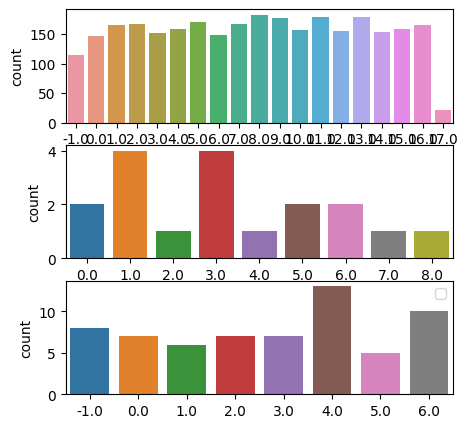

In [24]:
fig, axs = plt.subplots(nrows=3, figsize=(5, 5))
soc = SocietyConstantsEnergyPrices(**common_params["kwargs"])
nerby_radius = common_params["kwargs"]["nerby_radius"]
initial_chargers = soc.city.charger_pos
customers = soc.customers

car_ages = {}
for c_type in car_types:
    car_ages[c_type] = []

for customer in customers:
    current_car = customer.car
    car_ages[current_car.car_type].append(current_car.age(0,1)//1)

for i, c_type in enumerate(car_types):
    sns.countplot(ax=axs[i], x = car_ages[c_type])


plt.legend(bbox_to_anchor=(1, 1))
save_in("initialCity", "pictures", plt)

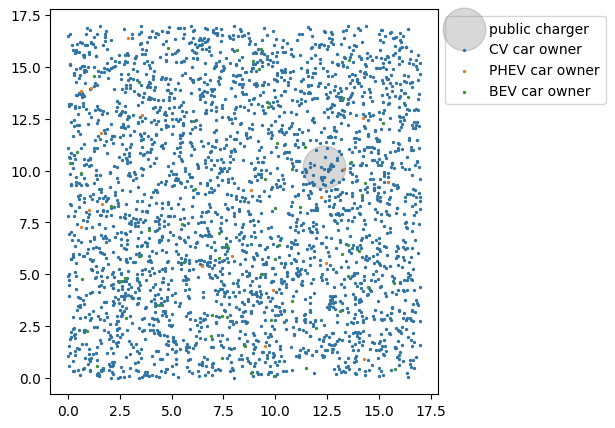

In [11]:
fig, ax = plt.subplots(figsize=(5, 5))
soc = TmpSociety(**common_params["kwargs"])
nerby_radius = common_params["kwargs"]["nerby_radius"]
initial_chargers = soc.city.charger_pos
customers = soc.customers
ax.axis("equal")
ax.scatter(
    initial_chargers[:, 0],
    initial_chargers[:, 1],
    alpha=0.3,
    # s=1000
    s=3.1415926 * 300 * nerby_radius**2,
    c="gray",
    label= "public charger"
)
customers_X = np.array([cus.home[0] for cus in customers])
customers_Y = np.array([cus.home[1] for cus in customers])
owner = {}
for c_type in car_types:
    owner[c_type] = np.array([cus.get_car_type() == c_type for cus in customers])

for c_type in car_types:
    ax.scatter(customers_X[owner[c_type]], customers_Y[owner[c_type]], s=2, c=colors[c_type], label=f"{c_type} car owner")

plt.legend(bbox_to_anchor=(1, 1))
save_in("initialCity", "pictures", plt)

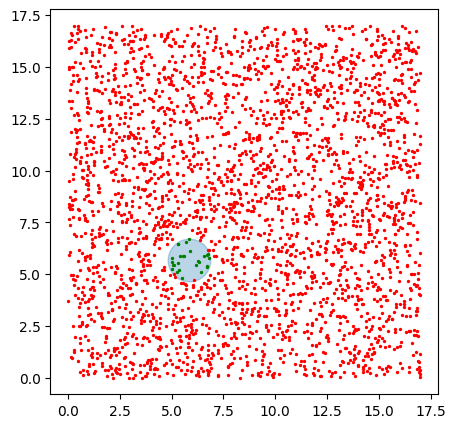

In [12]:
fig, ax = plt.subplots(figsize=(5, 5))
soc = TmpSociety(**common_params["kwargs"])
nerby_radius = common_params["kwargs"]["nerby_radius"]
initial_chargers = soc.city.charger_pos
customers = soc.customers
ax.axis("equal")
ax.scatter(
    initial_chargers[:, 0],
    initial_chargers[:, 1],
    alpha=0.3,
    # s=1000
    s=3.1415926 * 300 * nerby_radius**2,
)
customers_X = np.array([cus.home[0] for cus in customers])
customers_Y = np.array([cus.home[1] for cus in customers])
is_nerby_array = np.zeros(len(soc.customers))

for i, customer in enumerate(soc.customers):
    if soc.public_charging_nerby(customer):
        is_nerby_array[i] = 1

ax.scatter(
    customers_X[is_nerby_array == 1], customers_Y[is_nerby_array == 1], s=2, c="g"
)
ax.scatter(
    customers_X[is_nerby_array == 0], customers_Y[is_nerby_array == 0], s=2, c="r"
)

In [13]:
soc.run(T - 1)

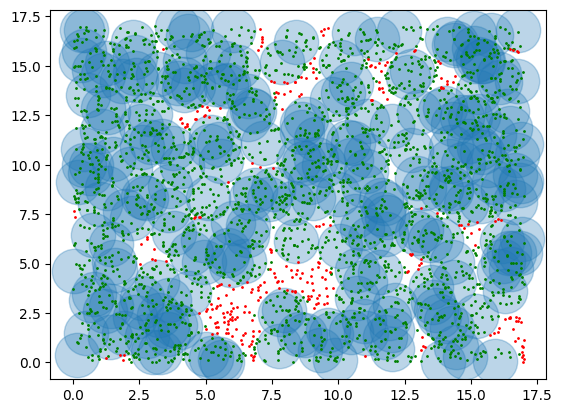

In [14]:
initial_chargers = soc.city.charger_pos
customers = soc.customers
plt.scatter(
    initial_chargers[:, 0],
    initial_chargers[:, 1],
    alpha=0.3,
    s=3.1415926 * 25 * 13 * nerby_radius**2,
)
customers_X = np.array([cus.home[0] for cus in customers])
customers_Y = np.array([cus.home[1] for cus in customers])
is_nerby_array = np.zeros(len(soc.customers))
ax.axis("equal")

for i, customer in enumerate(soc.customers):
    if soc.public_charging_nerby(customer):
        is_nerby_array[i] = 1

plt.scatter(
    customers_X[is_nerby_array == 1], customers_Y[is_nerby_array == 1], s=1, c="g"
)
plt.scatter(
    customers_X[is_nerby_array == 0], customers_Y[is_nerby_array == 0], s=1, c="r"
)

In [15]:
soc.city.count_chargers()

246

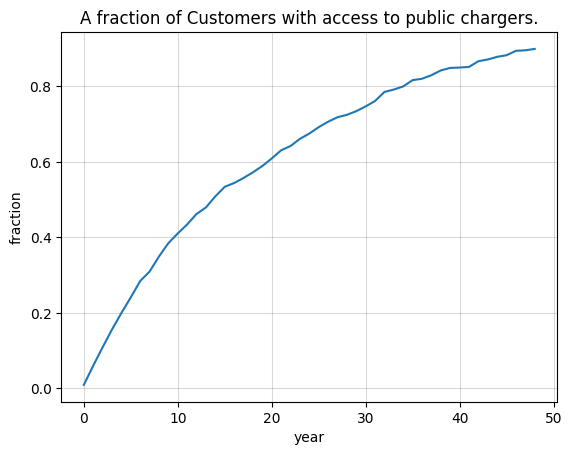

In [16]:
fig, ax = plt.subplots()
fig.set_facecolor("white")

ax.plot(range((T - 1) // 12), soc.coverage)
ax.set_title("A fraction of Customers with access to public chargers.")
ax.set_xlabel("year")
ax.set_ylabel("fraction")
ax.grid(color="gray")
ax.grid(alpha=0.3)